<a href="https://colab.research.google.com/github/Shashank-u803/BIS-Lab/blob/main/Week%207/Parallel_cellular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your optimization function (use 'x' as variable, use numpy as np):
Example: np.sum(x**2)
f(x) = np.sum(x**3 - x**2)
Enter number of dimensions: 2
Enter lower bound: -100
Enter upper bound: 100
Enter grid rows: 4
Enter grid columns: 4
Enter max iterations: 10

Starting optimization...
--------------------------------------------------
Iteration   0 | Best: -1635965.736655 | Avg: -216079.637817
--------------------------------------------------

Optimization Complete!
Best Solution: [-98.4738995 -87.2303478]
Best Fitness: -1635965.7366545750

Generating visualizations...


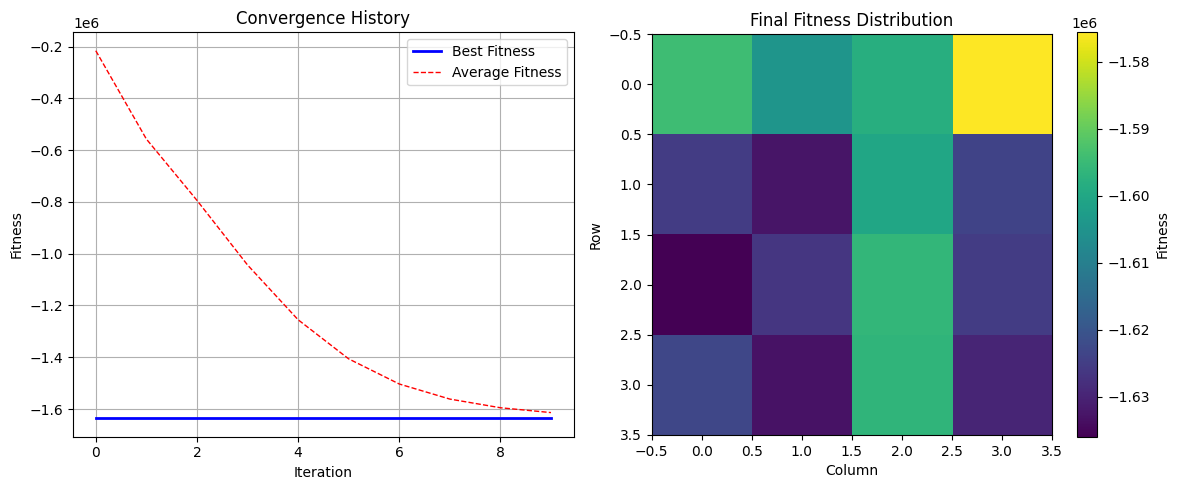

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Problem - Get function from user
print("Enter your optimization function (use 'x' as variable, use numpy as np):")
print("Example: np.sum(x**2)")
func_str = input("f(x) = ")
objective_function = eval(f"lambda x: {func_str}")

# Step 2: Initialize Parameters
dimensions = int(input("Enter number of dimensions: "))
lower_bound = float(input("Enter lower bound: "))
upper_bound = float(input("Enter upper bound: "))
grid_rows = int(input("Enter grid rows: "))
grid_cols = int(input("Enter grid columns: "))
max_iterations = int(input("Enter max iterations: "))

num_cells = grid_rows * grid_cols

# Step 3: Initialize Population
population = np.random.uniform(lower_bound, upper_bound, (grid_rows, grid_cols, dimensions))
fitness = np.zeros((grid_rows, grid_cols))
best_solution = None
best_fitness = float('inf')

# Track history for visualization
best_fitness_history = []
avg_fitness_history = []

# Helper function to get neighbors (Moore neighborhood - 8 neighbors)
def get_neighbors(i, j):
    neighbors = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            ni = (i + di) % grid_rows
            nj = (j + dj) % grid_cols
            neighbors.append((ni, nj))
    return neighbors

print("\nStarting optimization...")
print("-" * 50)

# Step 6: Iterate
for iteration in range(max_iterations):

    # Step 4: Evaluate Fitness
    for i in range(grid_rows):
        for j in range(grid_cols):
            fitness[i, j] = objective_function(population[i, j])

            # Track best solution
            if fitness[i, j] < best_fitness:
                best_fitness = fitness[i, j]
                best_solution = population[i, j].copy()

    # Print progress
    if iteration % 10 == 0:
        avg_fitness = np.mean(fitness)
        print(f"Iteration {iteration:3d} | Best: {best_fitness:.6f} | Avg: {avg_fitness:.6f}")

    # Store history
    best_fitness_history.append(best_fitness)
    avg_fitness_history.append(np.mean(fitness))

    # Step 5: Update States based on neighbors
    new_population = population.copy()

    for i in range(grid_rows):
        for j in range(grid_cols):
            neighbors = get_neighbors(i, j)

            # Find best neighbor
            best_neighbor = None
            best_neighbor_fitness = float('inf')

            for ni, nj in neighbors:
                if fitness[ni, nj] < best_neighbor_fitness:
                    best_neighbor_fitness = fitness[ni, nj]
                    best_neighbor = (ni, nj)

            # Update: move towards best neighbor
            if best_neighbor_fitness < fitness[i, j]:
                alpha = 0.5  # step size
                direction = population[best_neighbor] - population[i, j]
                new_population[i, j] = population[i, j] + alpha * direction

                # Keep within bounds
                new_population[i, j] = np.clip(new_population[i, j], lower_bound, upper_bound)

    population = new_population

# Step 7: Output the Best Solution
print("-" * 50)
print("\nOptimization Complete!")
print(f"Best Solution: {best_solution}")
print(f"Best Fitness: {best_fitness:.10f}")

# Visualization
print("\nGenerating visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Convergence curve
axes[0].plot(best_fitness_history, 'b-', linewidth=2, label='Best Fitness')
axes[0].plot(avg_fitness_history, 'r--', linewidth=1, label='Average Fitness')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Fitness')
axes[0].set_title('Convergence History')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Final fitness distribution
im = axes[1].imshow(fitness, cmap='viridis', interpolation='nearest')
axes[1].set_xlabel('Column')
axes[1].set_ylabel('Row')
axes[1].set_title('Final Fitness Distribution')
plt.colorbar(im, ax=axes[1], label='Fitness')

plt.tight_layout()
plt.show()